# Predicción de calificaciones usando Random Forest.

Problema supervisado. Cada observación corresponde a las variables asociadas a una compañía en una fecha particular. No se controla por fecha o industría.


### 1. Cargar librería requeridas

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
from rating_package.rating_prediction_functions import *

### 2. Cargar archivos requeridos

Para cargar los archivo de datos se debe tener en cuenta lo siguiente:

* Todas las variables del archivo `research_data` que se desean incorporar al proceso de entrenamiento deben estar creadas en el archivo `features.csv`, y la llave corresponde a la columna `Key`. 
* Deben existir dos columnas para identificar las observaciones: `[Fecha, Ticker]`.
* Debe existir variable `IssuerRating` que corresponde al output.
* En caso de crear nuevas variables en el archivo `features.csv`, se deben evitar comas, tildes y otros símbolos.

In [12]:
# Nombres de variables y llaves:
feat_key = pd.read_csv('data/features_banks.csv', sep=',', index_col = ["Feature"], encoding = "latin1")
feat_key_pure = pd.read_csv('data/features_pure_banks.csv', sep=',', index_col = ["Feature"], encoding = "latin1")

# Encoder para calificaciones:
le = pd.read_csv('data/lab_encoder_banks.csv', sep=',', index_col = 0, encoding = "latin1")

# Datos de entrenamiento:
data = pd.read_csv('data/research_data_banks.csv', sep=',', index_col = ["Fecha", 'Ticker'], encoding = "latin1")

### 3. Proceso de entrenamiento.
#### 3.1. Parámetros

In [9]:
remove_nan = True # Remover filas con datos faltantes.
perc_train_size = 0.8 # Porcentaje de observaciones para entrenamiento.
model_file = 'model/rating_random_forest_banks.sav' # Modelo.
model_file_pure = 'model/rating_random_forest_pure_banks.sav' # Modelo.
sov_encoder_file = 'model/sov_lab_encoder_banks.sav' # Encoder de rating soberano.
output_file = 'output/pred_test_banks.csv' # Archivo de salida con prediciones.
output_file_pure = 'output/pred_test_banks_pure.csv' # Archivo de salida con prediciones.

#### 3.2. Entrenar modelo e imprimir resultados sobre muestra de testing
Se publican los siguientes archivos: 

* El archivo en la ruta `output_file` contiene las observaciones usadas para testing, el rating real y el rating que predice el argoritmo.

#### 3.2.1. Entrenamiento de modelo con datos de emergentes con Riesgo Soberano.

c:\users\daniel.velasquez\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Muestra de entrenamiento: 905
Muestra de testing: 227

Score sobre muestra de testing:
0.9383259911894273



c:\users\daniel.velasquez\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Ranking:
1. Rating Soberano País de Origen Deuda LP Moneda Extranjera (0.125493)
2. Equity + Allowances Losses / Loans Prom. LTM (0.043696)
3. Asset Turnover Anualizado Prom. LTM (0.041500)
4. Productive Assets / Int. Bearing Liab. Prom. LTM (0.040473)
5. Total Gross Loans / Total Deposits Prom. LTM (0.039659)
6. Non-Interest Expenses / Total Income Prom. LTM (0.038156)
7. NII / Productive Assets Prom. LTM (0.036815)
8. NII / Productive Assets (0.036130)
9. Total Gross Loans / Total Deposits (0.035765)
10. Total Deposits / Total Liabilities Prom. LTM (0.034636)
11. Equity + Allowances Losses / Loans (0.034199)
12. Allowances / G. Loans Prom. LTM (0.033262)
13. Leverage (ROE / ROA)
(Act. / Pat. ) Prom. LTM (0.031958)
14. Asset Turnover Anualizado (0.031180)
15. Liquid Assets / Total Assets Prom. LTM (0.030528)
16. Allowances / G. Loans (0.029936)
17. Leverage (ROE / ROA)
(Act. / Pat. ) (0.029615)
18. Net Margin del Trimestre Prom. LTM (0.029382)
19. Productive Assets / Int. Bearing Lia

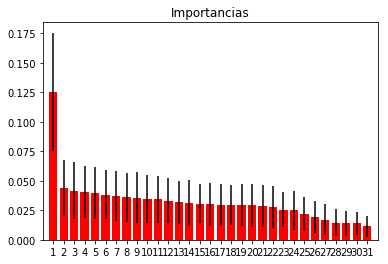

In [10]:
model_training(data, feat_key, le, remove_nan, perc_train_size, output_file, model_file, sov_encoder_file)

#### 3.2.2. Entrenamiento de modelo con datos de desarrollados sin Riesgo Soberano.

c:\users\daniel.velasquez\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Muestra de entrenamiento: 905
Muestra de testing: 227

Score sobre muestra de testing:
0.8766519823788547


Ranking:
1. Equity + Allowances Losses / Loans Prom. LTM (0.052114)
2. Asset Turnover Anualizado Prom. LTM (0.048808)
3. Total Gross Loans / Total Deposits Prom. LTM (0.046920)
4. Productive Assets / Int. Bearing Liab. Prom. LTM (0.044194)
5. Total Deposits / Total Liabilities Prom. LTM (0.042755)
6. NII / Productive Assets Prom. LTM (0.042515)
7. Non-Interest Expenses / Total Income Prom. LTM (0.042274)
8. Equity + Allowances Losses / Loans (0.041437)
9. NII / Productive Assets (0.040863)
10. Allowances / G. Loans Prom. LTM (0.039578)
11. Total Gross Loans / Total Deposits (0.039083)
12. Leverage (ROE / ROA)
(Act. / Pat. ) Prom. LTM (0.037580)
13. Allowances / G. Loans (0.036577)
14. Asset Turnover Anualizado (0.036331)
15. Total Deposits / Total Liabilities (0.035499)
16. Liquid Assets / Total Assets Prom. LTM (0.035101)
17. Productive Assets / Int. Bearing Liab. (0.032306)
18.

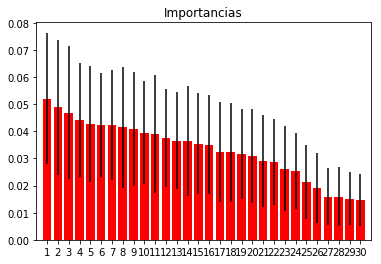

In [14]:
data = pd.read_csv('data/research_data_banks.csv', sep=',', index_col = ["Fecha", 'Ticker'], encoding = "latin1")
model_training(data, feat_key_pure, le, remove_nan, perc_train_size, output_file_pure, model_file_pure, sov_encoder_file)

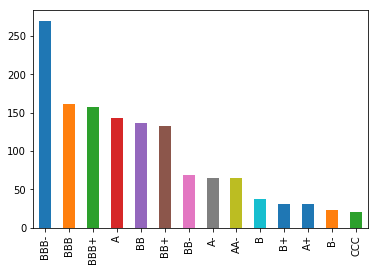

In [29]:
data = pd.read_csv('data/research_data_banks.csv', sep=',', index_col = ["Fecha", 'Ticker'], encoding = "latin1")
pd.Series(np.array(data['IssuerRating'])).value_counts().plot('bar')
